<a href="https://colab.research.google.com/github/robin-ochieng/Machine-Learning/blob/main/Principal_Component_Analysis%20By%20R.O.O..ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
iris = load_iris()
X = iris.data
y = iris.target

## STANDARDIZE THE DATA

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X


In [12]:

cov_matrix = np.cov(X_scaled.T)


In [14]:
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

## OMPUTE EIGENVECTORS AND EIGENVALUES

In [15]:

eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)


In [16]:
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [17]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

## SORT EIGENVALUES IN DESCENDING ORDER

In [18]:
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]


In [19]:
sorted_index

array([0, 1, 2, 3])

In [20]:
sorted_eigenvalue

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [21]:
sorted_eigenvectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

##CHOOSE PRINCIPAL COMPONENTS

In [22]:
k = 2
principal_components = sorted_eigenvectors[:,:k]


In [23]:
principal_components

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

## PROJECT DATA ONTO LOWER-DIMENSIONAL LINEAR SUBSPACE

In [24]:

X_new = np.dot(X_scaled, principal_components)


In [25]:
X_new

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356],
       [-2.1663101 , -1.04369065],
       [-2.32613087, -0.13307834],
       [-2.2184509 ,  0.72867617],
       [-2.6331007 ,  0.96150673],
       [-2.1987406 , -1.86005711],
       [-2.26221453, -2.68628449],
       [-2.2075877 , -1.48360936],
       [-2.19034951, -0.48883832],
       [-1.898572  , -1.40501879],
       [-2.34336905, -1.12784938],
       [-1.914323  , -0.40885571],
       [-2.20701284, -0.92412143],
       [-2.7743447 , -0.45834367],
       [-1.81866953, -0.08555853],
       [-2.22716331, -0.13725446],
       [-1.95184633,  0.62561859],
       [-2.05115137, -0.24216355],
       [-2.16857717, -0.52714953],
       [-2.13956345,

#Evaluating the Results of PCA

####To calculate variance explained, cumulative variance explained and plot a scree plot using Scikit-Learn library

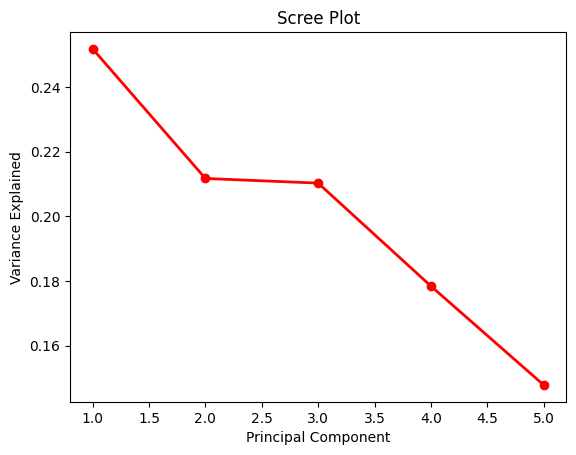

In [28]:
# Create an array with random values
X = np.random.rand(100,5)

# Fit PCA on X
pca = PCA().fit(X)

# Calculate Variance Explained
var_exp = pca.explained_variance_ratio_

# Calculate Cumulative Variance Explained
cum_var_exp = np.cumsum(var_exp)

# Plot Scree Plot
plt.plot(range(1,len(var_exp)+1), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


In [3]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [ ]:
X_reduced

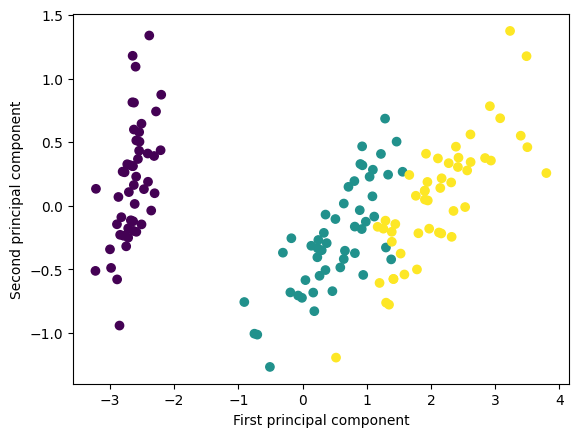

In [8]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()